In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [173]:
with open('./ex2data1.txt', 'r') as file:
    content = file.read().splitlines()

raw_X = []
raw_y = []
content = map(lambda l: l.split(','), content)
for (score1, score2, result) in content:
    raw_X.append((float(score1), float(score2)))
    raw_y.append(int(result))
    
raw_X = np.asarray(raw_X)
raw_y = np.asarray(raw_y)

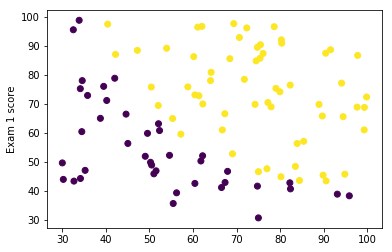

In [174]:
plt.scatter(raw_X[:, 0], raw_X[:, 1], c=raw_y)
plt.ylabel('Exam 2 score')
plt.ylabel('Exam 1 score')

In [175]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

g = sigmoid

In [176]:
print(g(0))
print(g(100))
print(g(-10))
print(g(-100))
print(g(np.asarray([1, 100, -1, -100])))

0.5
1.0
4.53978687024e-05
3.72007597602e-44
[  7.31058579e-01   1.00000000e+00   2.68941421e-01   3.72007598e-44]


In [178]:
m = len(raw_X)
y = raw_y.reshape((m, 1))
means = raw_X.mean(axis=0)
stds = raw_X.std(axis=0)
X = np.hstack([np.ones((m, 1)), raw_X])
for j in range(1, X.shape[1]):
    X[:, j] = (X[:, j] - means[j - 1]) / stds[j - 1]

In [179]:
def J(h_theta_X, y):
    y_1 = y.T.dot(np.log(h_theta_X))
    y_0 = (1 - y).T.dot(np.log(1 - h_theta_X))
    return (-1.0 / m) * (y_1 + y_0)[0, 0]

In [180]:
theta = np.zeros((3, 1))
h_theta_X = g(X.dot(theta))
loss = J(h_theta_X, y)
print(loss)

0.69314718056


In [181]:
def d_dtheta(X, y, h_theta_X):
    return X.T.dot(h_theta_X - y)

In [182]:
theta = np.zeros((3, 1))
n_iters = 10000
alpha = 0.1

for i in range(n_iters):
    h_theta_X = g(X.dot(theta))
    loss = J(h_theta_X, y)
    print('Loss: {:.5f}'.format(loss))
    theta = theta - ((alpha / m) * d_dtheta(X, y, h_theta_X))

Loss: 0.69315
Loss: 0.67812
Loss: 0.66383
Loss: 0.65022
Loss: 0.63726
Loss: 0.62493
Loss: 0.61318
Loss: 0.60198
Loss: 0.59131
Loss: 0.58113
Loss: 0.57142
Loss: 0.56215
Loss: 0.55329
Loss: 0.54483
Loss: 0.53674
Loss: 0.52900
Loss: 0.52158
Loss: 0.51448
Loss: 0.50768
Loss: 0.50115
Loss: 0.49488
Loss: 0.48887
Loss: 0.48308
Loss: 0.47753
Loss: 0.47218
Loss: 0.46703
Loss: 0.46207
Loss: 0.45729
Loss: 0.45269
Loss: 0.44824
Loss: 0.44395
Loss: 0.43980
Loss: 0.43580
Loss: 0.43193
Loss: 0.42818
Loss: 0.42455
Loss: 0.42104
Loss: 0.41764
Loss: 0.41434
Loss: 0.41115
Loss: 0.40804
Loss: 0.40503
Loss: 0.40211
Loss: 0.39927
Loss: 0.39651
Loss: 0.39383
Loss: 0.39122
Loss: 0.38868
Loss: 0.38622
Loss: 0.38381
Loss: 0.38147
Loss: 0.37919
Loss: 0.37696
Loss: 0.37479
Loss: 0.37268
Loss: 0.37062
Loss: 0.36860
Loss: 0.36664
Loss: 0.36472
Loss: 0.36285
Loss: 0.36101
Loss: 0.35922
Loss: 0.35747
Loss: 0.35576
Loss: 0.35409
Loss: 0.35245
Loss: 0.35085
Loss: 0.34928
Loss: 0.34775
Loss: 0.34624
Loss: 0.34477
Loss: 

In [183]:
sample = np.ones((1, 3))
sample[0, 1] = (45 - means[0]) / stds[0] 
sample[0, 2] = (85 - means[1]) / stds[1]
print(sample)
print(g(sample.dot(theta)))

[ 65.64427406  66.22199809]
[[ 1.         -1.06629865  1.0155961 ]]
[[ 0.77603665]]


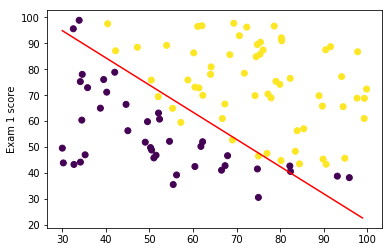

In [193]:
plot_x = [np.min(X[:, 1]), np.max(X[:, 1])]
plot_y = (-1.0 / theta[2, 0]) * (np.multiply(theta[1, 0], plot_x) + theta[0, 0])
plot_y = plot_y.tolist()

# normalize predictions
for j in range(len(plot_y)):
    plot_y[j] = plot_y[j] * stds[j] + means[j]
    plot_x[j] = plot_x[j] * stds[j] + means[j]
    
plt.scatter(raw_X[:, 0], raw_X[:, 1], c=raw_y)
plt.ylabel('Exam 2 score')
plt.ylabel('Exam 1 score')
plt.plot(plot_x, plot_y, color='r', linestyle='-')